<a href="https://colab.research.google.com/github/lukastabu/02-demo/blob/master/sprint2_part1_introduction_to_langchain_and_chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 2 Part 1: Introduction to LangChain and Chains

Welcome to this Jupyter Notebook, where we explore the exciting world of LangChain and Chains!

In this notebook, you'll embark on a beginner-friendly journey to understand the core concepts of LangChain, how Chains work, and their powerful applications in building dynamic and intelligent workflows. Through interactive code examples and explanations, you'll learn how to combine tools and models into seamless pipelines to tackle real-world challenges.

This Jupyter Notebook is designed to help you get hands-on experience with LangChain and discover how Chains can simplify and enhance complex processes.

## **Please be aware of the costs of calling LLMs like OpenAI or Gemini**.
###   Check the costs here for [OpenAI](https://platform.openai.com/settings/organization/billing/overview):
###   For Gemini it's [here](https://aistudio.google.com/app/apikey) and [here](https://ai.google.dev/pricing#1_5flash).

### Installing Python packages

In [ ]:
!pip install langchain_community

In [ ]:
!pip install langchain_openai

In [ ]:
!pip install langchain_community

### (Optional) Saving API keys securely in Secrets tab

In production systems, saving API keys plainly in the code is not recommend.
Thus, you can chosoe to save API keys in the Secrets tab in the Google Colab.

Just make sure to name these keys properly and read them in the Python cell:
* OPENAI_API_KEY
* GEMINI_API_KEY
* ANTHROPIC_API_KEY

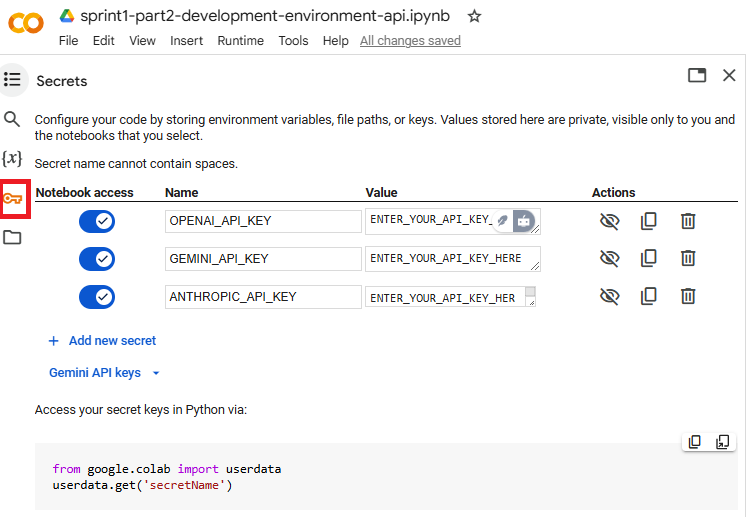

### Set-up all API keys

In [ ]:
OPENAI_API_KEY="ENTER YOUR API KEY HERE OR USE GOOGLE COLAB SECRETS"
GEMINI_API_KEY="ENTER YOUR API KEY HERE OR USE GOOGLE COLAB SECRETS"

# Ignoring all warnings
This is done, to clearly see the output from the cell, as well as to mitigate rapidly changing LangChain/LangGraph APIs.

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Example  1: Chat Messages

Like text, but specified with a message type (System, Human, AI).

Here are simulations of chat messages.

* **System** - Helpful background context that tell the AI what to do
* **Human** - Messages that are intented to represent the user
* **AI** - Messages that show what the AI responded with

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(model="gpt-4o-mini", api_key=OPENAI_API_KEY)

In [ ]:
chat.invoke(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out what to eat in one short sentence"),
        HumanMessage(content="I like tomatoes, what should I eat?")
    ]
)

In [ ]:
chat.invoke(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out where to travel in one short sentence"),
        HumanMessage(content="I like the beaches where should I go?"),
        AIMessage(content="You should go to Nice, France"),
        HumanMessage(content="What else should I do when I'm there?")
    ]
)

In [ ]:
chat.invoke(
    [
        HumanMessage(content="What day comes after Thursday?")
    ]
)

# Example 2: Trying out prompt engineering with LangChain

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

model = ChatOpenAI(model="gpt-4o-mini", api_key=OPENAI_API_KEY)
prompt = ChatPromptTemplate.from_template("tell me a joke about {topic}")
chain = prompt | model | StrOutputParser()

chain.invoke({"topic": "bears"})

# Example 3: Trying out LLM Chain

In [ ]:
from langchain.chains import LLMChain
from langchain_community.chat_models import ChatOpenAI
from langchain_core.prompts import PromptTemplate

prompt_template = "Tell me a {adjective} joke"
prompt = PromptTemplate(
    input_variables=["adjective"], template=prompt_template
)
llm = LLMChain(llm=ChatOpenAI(model="gpt-4o-mini", api_key=OPENAI_API_KEY), prompt=prompt)
result = llm.invoke({"adjective": "policeman"})
print(result)

# Exercise 4: More complex LLM Chain example, chaining multiple chains

In this exercise, you will need to implement missing code as well as fix some Python errors, so that the collection of the user information would work.

You will need to use chains for this exercise.




In [ ]:
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate

# Initialize the language model
llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-4o-mini")

# TO DO: Add missing code here.
#
#
#
#
#
#

summary_chain = LLMChain(llm=llm, prompt=summary_prompt, output_key="user_summary")


# Function to run the information collection process
def collect_user_information():
    # Step 1: Name Collection


    name_response = name_chain.invoke(previous_info="")
    print(name_response)
    name = input("Your Name: ")

    # Step 2: Location Collection
    location_response = location_chain.invoke(name=name)
    print(location_response)
    location = input("Your Location: ")

    # Step 3: Summary
    summary_response = summary_chain.invoke(name=name, location=location)
    print(summary_response)

    return {
        "name": name,
        "location": location,
        "summary": summary_response
    }

# Run the information collection
user_information = collect_user_information()
print("\nCollected User Information:")
print(user_information)

# Exercise 5: Sequential Chains

Easy chains where you can use the output of an LLM as an input into another.
<br>
Good for breaking up tasks (and keeping your LLM focused)

Please try out ```SimpleSequentialChain``` chain.



# Exercise 6: Trying out Router Chain

Please try out ```RouterChain``` chain.

# Exercise 7: Trying out Memory in LangChain

Please implement memory for a chatbot from this [documentation](https://python.langchain.com/v0.1/docs/use_cases/chatbots/memory_management/).

# Optional Exercise 1: LLM chain example to collect user information:

Write code to complete these steps:

* Step 1: Ask for the user's name.
* Step 2: Ask for their location.
* Step 3: Summarize the collected information.


# Optional Exercise 2: Use Calculator tool with LangChain

Implement code to use a calculator tool with LangChain